### 생선 분류
- datasets: fish.csv
- feature: Weghit, Length
- label/target: Species
- learning method: supervised learning classification
- learning algorithm: KNN

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DATA_FILE = '../data/fish.csv'

In [3]:
# rows: Bream, Smelt
# columns: Species, Weight, Length

fish_df = pd.read_csv(DATA_FILE, usecols=[0, 1, 2])

In [4]:
mask = (fish_df['Species'] == 'Bream') | (fish_df['Species'] == 'Smelt')
two_fish_df = fish_df.loc[mask]

In [5]:
two_fish_df = two_fish_df.reset_index().drop('index', axis=1)
two_fish_df.tail()

,Species,Weight,Length
44,Smelt,12.2,12.2
45,Smelt,13.4,12.4
46,Smelt,12.2,13.0
47,Smelt,19.7,14.3
48,Smelt,19.9,15.0


In [6]:
# Species column to int
names = fish_df['Species'].unique().tolist()  # numpy 소스
mapping = {name:idx for idx, name in enumerate(names)}  # dict comprehension
fish_df['Species_Code'] = fish_df['Species'].map(mapping)
fish_df

,Species,Weight,Length,Species_Code
0,Bream,242.0,25.4,0
1,Bream,290.0,26.3,0
2,Bream,340.0,26.5,0
3,Bream,363.0,29.0,0
4,Bream,430.0,29.0,0
...,...,...,...,...
154,Smelt,12.2,12.2,6
155,Smelt,13.4,12.4,6
156,Smelt,12.2,13.0,6
157,Smelt,19.7,14.3,6


In [7]:
# Species column to int
names = two_fish_df['Species'].unique().tolist()  # numpy 소스
mapping = {name:idx for idx, name in enumerate(names)}  # dict comprehension
two_fish_df['Species_Code'] = two_fish_df['Species'].map(mapping)
two_fish_df.tail()

,Species,Weight,Length,Species_Code
44,Smelt,12.2,12.2,1
45,Smelt,13.4,12.4,1
46,Smelt,12.2,13.0,1
47,Smelt,19.7,14.3,1
48,Smelt,19.9,15.0,1


In [8]:
# train_data, test_data split
from sklearn.model_selection import train_test_split

In [9]:
# feature & label
feature = two_fish_df[['Weight', 'Length']]
label = two_fish_df['Species_Code']

print(f"feature.shape: {feature.shape}, {feature.ndim}D")
print(f"label.shape: {label.shape}, {label.ndim}D")

feature.shape: (49, 2), 2D
label.shape: (49,), 1D


In [10]:
# train:test = 80:20 ---> test_size=0.2 or train_size=0.8
# 나는 보봉은 7:3 많이 사용하는디 ㅇㅅㅇ 그렇게 배웠으니까
# if classification, stratify (parameter): label's rate consider
X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.2, random_state=14, stratify=label)

In [11]:
print(f"X_train: {X_train.shape}, {X_train.ndim}D")
print(f"y_train: {y_train.shape}, {y_train.ndim}D")
print()
print(f"X_test: {X_test.shape}, {X_test.ndim}D")
print(f"y_test: {y_test.shape}, {y_test.ndim}D")

X_train: (39, 2), 2D
y_train: (39,), 1D

X_test: (10, 2), 2D
y_test: (10,), 1D


In [12]:
# label's 'Speacise' ratio
print(y_train.value_counts()[0] / y_train.shape[0] * 100, y_train.value_counts()[1]/ y_train.shape[0] * 100)

71.7948717948718 28.205128205128204


In [13]:
print(y_test.value_counts()[0]/y_test.shape[0]*100, y_test.value_counts()[1]/y_test.shape[0] * 100)

70.0 30.0


In [14]:
# feature scalering
from sklearn.preprocessing import MinMaxScaler

In [15]:
mmscaler = MinMaxScaler()

In [16]:
# base in data, MinMaxScaler learning
mmscaler.fit(X_train)

MinMaxScaler()

In [18]:
mmscaler.min_, mmscaler.data_min_, mmscaler.scale_, mmscaler.data_max_      # scale_ == max

(array([-0.00704935, -0.3442623 ]),
 array([ 7. , 10.5]),
 array([0.00100705, 0.03278689]),
 array([1000.,   41.]))

In [20]:
# train data scalering
X_train_scale = mmscaler.transform(X_train)

In [24]:
X_train_scale.shape, X_train_scale.min(), X_train_scale.max()

((39, 2), 0.0, 1.0000000000000002)

In [25]:
# test data scalering
X_test_scale = mmscaler.transform(X_test)

In [26]:
X_test_scale.shape, X_test_scale.min(), X_test_scale.max()

((10, 2), -0.022950819672131084, 0.8032786885245904)

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
model = KNeighborsClassifier()

In [29]:
# learning
# model.n_neighbors = 3
model.fit(X_train_scale, y_train)

KNeighborsClassifier()

In [30]:
# after learning
model.classes_, model.n_samples_fit_        # ndarray don't have feature_names

(array([0, 1], dtype=int64), 39)

In [31]:
# 모델 성능 평가
model.score(X_test_scale, y_test)

1.0

In [33]:
# prediction --> non train, validation data use
# - notion: input data ==> 2D: need name, so input data shape is DataFrame
# - excet: np.array don't need columns names

new_data = pd.DataFrame([[413, 27.8]], columns=['Weight', 'Length'])
new_data_scale = mmscaler.transform(new_data)

In [34]:
new_data_scale

array([[0.40886203, 0.56721311]])

In [35]:
model.predict(new_data_scale)

array([0], dtype=int64)

In [36]:
# find k-nearset data: len is k
distance, index = model.kneighbors(new_data_scale)

In [37]:
print(distance, index, sep='\n')

[[0.04290757 0.06390103 0.0725882  0.08118665 0.08497713]]
[[ 3  4  9 26 38]]


In [38]:
neighbors = index.reshape(-1).tolist()  # 1D data

In [40]:
X_train_scale[neighbors]

array([[0.42598187, 0.60655738],
       [0.35850957, 0.60655738],
       [0.44612286, 0.6295082 ],
       [0.44612286, 0.63934426],
       [0.33534743, 0.52459016]])

In [43]:
k_weight = X_train_scale[neighbors][:, 0]
k_length = X_train_scale[neighbors][:, 1]

print(k_weight, k_length, sep='\n')

[0.42598187 0.35850957 0.44612286 0.44612286 0.33534743]
[0.60655738 0.60655738 0.6295082  0.63934426 0.52459016]


In [48]:
X_train_scale[:, 0]

array([2.84994965e-01, 1.27895267e-02, 6.77744209e-01, 4.25981873e-01,
       3.58509567e-01, 6.44511581e-03, 4.96475327e-01, 9.54682779e-01,
       2.92044310e-03, 4.46122860e-01, 7.18026183e-01, 2.36656596e-01,
       9.24471299e-01, 5.23665660e-03, 5.03524673e-04, 2.81973817e-03,
       1.29909366e-02, 1.71198389e-03, 6.07250755e-01, 6.97885196e-01,
       9.49647533e-01, 5.97180262e-01, 3.35347432e-01, 6.82779456e-01,
       6.97885196e-01, 8.48942598e-01, 4.46122860e-01, 1.00000000e+00,
       9.19436052e-01, 2.71903323e-03, 5.97180262e-01, 2.81973817e-03,
       4.96475327e-01, 5.72004028e-01, 0.00000000e+00, 7.11983887e-01,
       6.47532729e-01, 9.74823766e-01, 3.35347432e-01])

In [59]:
bream_idx = y_train[(y_train == 0)].index
smelt_idx = y_train[(y_train == 1)].index
smelt_idx

Index([47, 45, 42, 46, 36, 43, 48, 40, 38, 39, 37], dtype='int64')

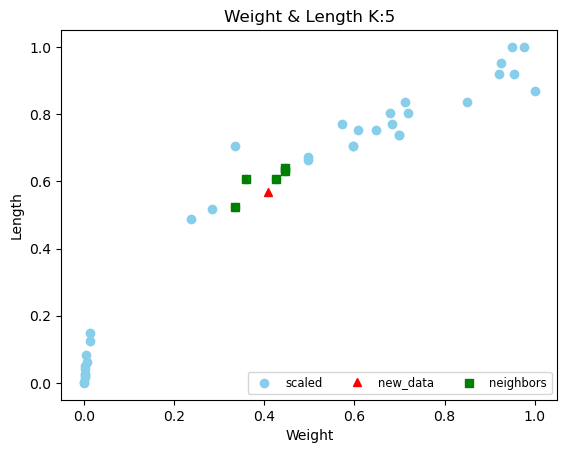

In [61]:
# visualization
# 물고기 종류에 따라 색을 다르게
# plt.scatter(two_fish_df.loc[:34,'Weight'], two_fish_df.loc[:34,'Length'], c='A0AFFF', label='Bream')
# plt.scatter(two_fish_df.loc[35:,'Weight'], two_fish_df.loc[35:,'Length'], c='skyblue', label='Smelt')
plt.scatter(X_train_scale[:, 0], X_train_scale[:, 1], c='skyblue', label='scaled')
plt.plot(new_data_scale[0, 0], new_data_scale[0, 1], color='red', marker='^', linestyle='', label='new_data')
plt.scatter(k_weight, k_length, c='green', marker='s', label='neighbors')

plt.title('Weight & Length K:5')
plt.ylabel('Length')
plt.xlabel('Weight')
plt.legend(loc='lower right', ncol=4, fontsize='small')
plt.show()